<a href="https://colab.research.google.com/github/ImenMasmoudiEm/LRStrategy/blob/main/LR_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

PATH = ''

import os
os.chdir(PATH)

#Making Predictions

In [ ]:
import numpy as np

train_set1 , valid_set1 = Windowing(np.array(makingData(Data)))

In [ ]:
model1= tf.keras.models.Sequential ([
        tf.keras.layers.InputLayer(input_shape=(6,19)),
        tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='selu'),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
        tf.keras.layers.Dense(19,activation='relu')])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 6, 32)             640       
                                                                 
 bidirectional_6 (Bidirectio  (None, 6, 64)            16640     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 6, 64)            24832     
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 6, 32)            10368     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 6, 19)             627       
                                                      

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model1.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])
history = model1.fit(train_set1, epochs=250,batch_size=10, validation_data= valid_set1, callbacks=[lr_schedule])

Epoch 1/250
29/29 [==============================] - 13s 92ms/step - loss: 78978.5312 - mae: 78978.9766 - val_loss: 67816.1172 - val_mae: 67816.5547 - lr: 1.0000e-08
Epoch 2/250
29/29 [==============================] - 0s 17ms/step - loss: 78978.5312 - mae: 78978.9766 - val_loss: 67816.1172 - val_mae: 67816.5547 - lr: 1.1220e-08
Epoch 3/250
29/29 [==============================] - 0s 16ms/step - loss: 78978.5312 - mae: 78978.9766 - val_loss: 67816.1172 - val_mae: 67816.5547 - lr: 1.2589e-08
Epoch 4/250
29/29 [==============================] - 1s 20ms/step - loss: 78978.5312 - mae: 78978.9766 - val_loss: 67816.1172 - val_mae: 67816.5547 - lr: 1.4125e-08
Epoch 5/250
29/29 [==============================] - 1s 27ms/step - loss: 78978.5312 - mae: 78978.9766 - val_loss: 67816.1172 - val_mae: 67816.5547 - lr: 1.5849e-08
Epoch 6/250
29/29 [==============================] - 1s 25ms/step - loss: 78978.5312 - mae: 78978.9766 - val_loss: 67816.1172 - val_mae: 67816.5547 - lr: 1.7783e-08
Epoch 7/2

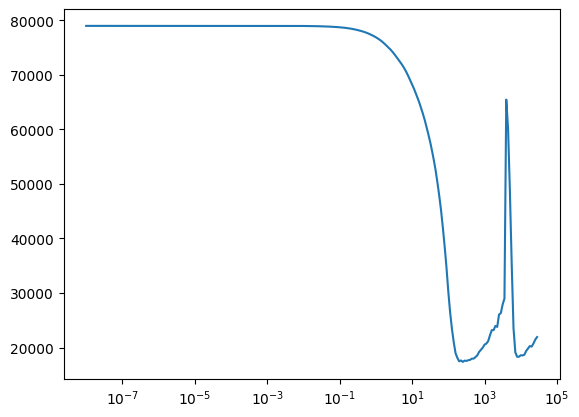

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])

In [ ]:
model1= tf.keras.models.Sequential ([
        tf.keras.layers.InputLayer(input_shape=(6,19)),
        tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='selu'),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
        tf.keras.layers.Dense(19,activation='relu')])

In [ ]:
import math
initial_learning_rate = 110
def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 40.0
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
callback = tf.keras.callbacks.LearningRateScheduler(lr_step_decay)
model1.compile(tf.keras.optimizers.SGD(initial_learning_rate),loss=tf.keras.losses.Huber(),metrics=[tf.keras.metrics.RootMeanSquaredError()])
history=model1.fit(train_set1,epochs=150,batch_size=10,validation_data= valid_set1,callbacks=[callback])

Epoch 1/150
29/29 [==============================] - 73s 89ms/step - loss: 78103.1250 - root_mean_squared_error: 218291.2344 - val_loss: 66123.6094 - val_root_mean_squared_error: 185831.4062 - lr: 110.0000
Epoch 2/150
29/29 [==============================] - 0s 14ms/step - loss: 76499.9609 - root_mean_squared_error: 216975.9219 - val_loss: 64850.4336 - val_root_mean_squared_error: 184518.4062 - lr: 110.0000
Epoch 3/150
29/29 [==============================] - 0s 17ms/step - loss: 75265.1328 - root_mean_squared_error: 215675.6094 - val_loss: 63938.5547 - val_root_mean_squared_error: 183221.0469 - lr: 110.0000
Epoch 4/150
29/29 [==============================] - 0s 16ms/step - loss: 74278.4844 - root_mean_squared_error: 214388.3906 - val_loss: 63159.9141 - val_root_mean_squared_error: 181935.2188 - lr: 110.0000
Epoch 5/150
29/29 [==============================] - 1s 19ms/step - loss: 73456.9922 - root_mean_squared_error: 213112.5156 - val_loss: 62649.4453 - val_root_mean_squared_error: 1

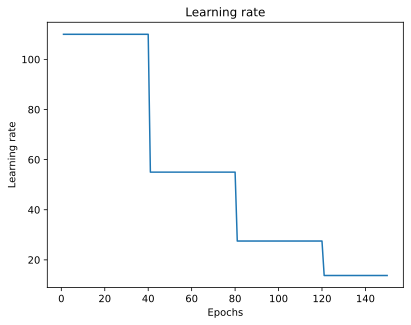

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy
def plot_lr(history):
    learning_rate = history.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.show()

plot_lr(history)

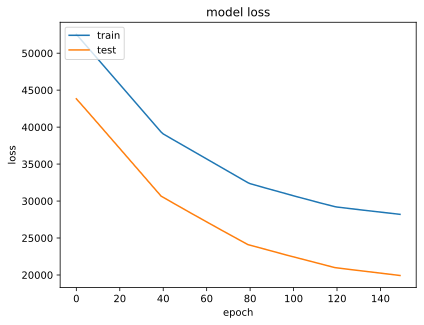

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model1.save('Model1.h5')

In [ ]:
model1 = tf.keras.models.load_model('Model1.h5')

In [ ]:
import math
initial_learning_rate = 10
def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 10.0
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))
callback = tf.keras.callbacks.LearningRateScheduler(lr_step_decay)
model1.compile(tf.keras.optimizers.SGD(initial_learning_rate),loss=tf.keras.losses.Huber(),metrics=[tf.keras.metrics.RootMeanSquaredError()])
history=model1.fit(train_set1,epochs=50,batch_size=10,validation_data= valid_set1,callbacks=[callback])

Epoch 1/50
29/29 [==============================] - 14s 94ms/step - loss: 28171.2129 - root_mean_squared_error: 96457.9922 - val_loss: 19901.2930 - val_root_mean_squared_error: 62345.5000 - lr: 10.0000
Epoch 2/50
29/29 [==============================] - 0s 15ms/step - loss: 28147.2910 - root_mean_squared_error: 96386.7109 - val_loss: 19877.0254 - val_root_mean_squared_error: 62278.3320 - lr: 10.0000
Epoch 3/50
29/29 [==============================] - 0s 14ms/step - loss: 28123.6094 - root_mean_squared_error: 96315.5391 - val_loss: 19850.6855 - val_root_mean_squared_error: 62211.3242 - lr: 10.0000
Epoch 4/50
29/29 [==============================] - 0s 14ms/step - loss: 28100.0508 - root_mean_squared_error: 96244.6719 - val_loss: 19826.2441 - val_root_mean_squared_error: 62144.8281 - lr: 10.0000
Epoch 5/50
29/29 [==============================] - 0s 16ms/step - loss: 28076.6348 - root_mean_squared_error: 96173.8203 - val_loss: 19800.4355 - val_root_mean_squared_error: 62078.3789 - lr: 10